# Выбор локации для скважины

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from warnings import simplefilter
from scipy import stats

In [2]:
data_1 = pd.read_csv('/datasets/geo_data_0.csv')
data_2 = pd.read_csv('/datasets/geo_data_1.csv')
data_3 = pd.read_csv('/datasets/geo_data_2.csv')
simplefilter(action='ignore', category=FutureWarning)

In [3]:
data_1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
data_1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [5]:
data_2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [6]:
data_2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [7]:
data_3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [8]:
data_3.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [9]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [10]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [11]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [12]:
data_1 = data_1.drop(['id'], axis=1)
data_2 = data_2.drop(['id'], axis=1)
data_3 = data_3.drop(['id'], axis=1)

**Данные загружены,во всех трех таблицах и во всех столбцах нет пропусков,я удалю столбцы 'id' так как мне кажется что они нам не пригодятся.**

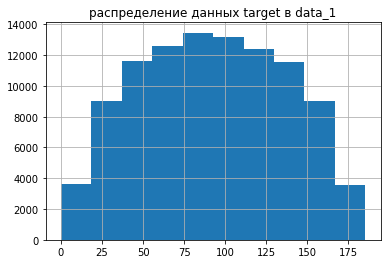

In [13]:
data_1['product'].hist();
plt.title('распределение данных target в data_1');

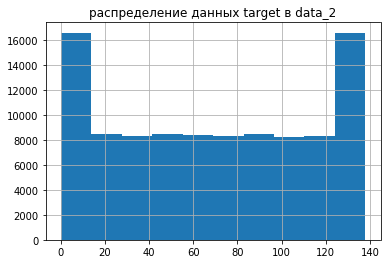

In [14]:
data_2['product'].hist();
plt.title('распределение данных target в data_2');

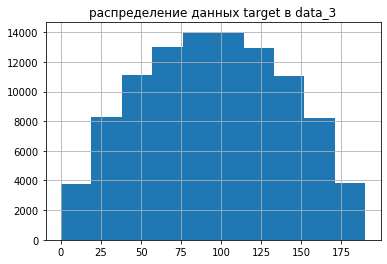

In [15]:
data_3['product'].hist();
plt.title('распределение данных target в data_3');

**В первой и третьей выборке данные распределены нормально,а вот со всторой выборкой что-то не так.Предполагаю что это связано с тем что данные созданы искусственно**

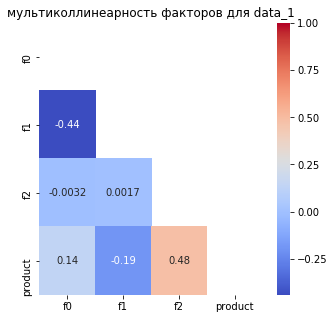

In [16]:
matrix = np.triu(data_1.corr())
plt.figure(figsize=(5,5))
hm = sns.heatmap(data_1.corr(),cbar=True,annot=True,cmap= 'coolwarm',mask=matrix)
hm.set_title('мультиколлинеарность факторов для data_1');

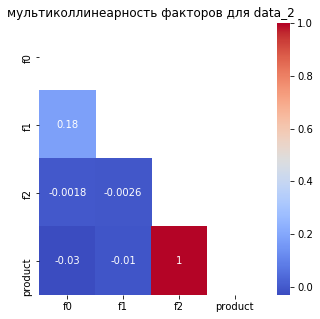

In [17]:
matrix = np.triu(data_2.corr())
plt.figure(figsize=(5,5))
hm = sns.heatmap(data_2.corr(),cbar=True,annot=True,cmap= 'coolwarm',mask=matrix)
hm.set_title('мультиколлинеарность факторов для data_2');

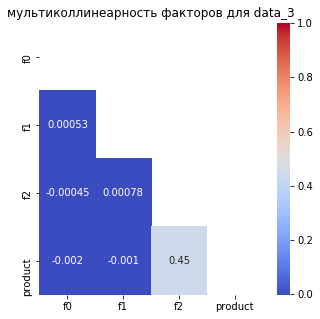

In [18]:
matrix = np.triu(data_3.corr())
plt.figure(figsize=(5,5))
hm = sns.heatmap(data_3.corr(),cbar=True,annot=True,cmap= 'coolwarm',mask=matrix)
hm.set_title('мультиколлинеарность факторов для data_3');

**Во второй выборке наблюдается сильная корреляция F2 с Product**

## Обучение и проверка модели

In [19]:
#Напишу функции для разбиения датасетов на выборке ,а так же напишу функцию для обучения модели

def sample(data):
    features = data.drop(['product'], axis=1) 
    target = data['product']
    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)
    return features_train, features_valid, target_train, target_valid


def model(features_train,target_train,features_valid,target_valid):
    model = LinearRegression()
    model.fit(features_train,target_train)
    predictions_valid = model.predict(features_valid)
    rmse = mean_squared_error(target_valid, predictions_valid)**0.5
    predictions_mean = predictions_valid.mean()
    return predictions_valid,rmse,predictions_mean

In [20]:
#первая выбока:
features_train_1, features_valid_1, target_train_1, target_valid_1 = sample(data_1)
predictions_valid_1,rmse_1,predictions_mean_1 = model(features_train_1, target_train_1,features_valid_1, target_valid_1)
print('Средний запас предсказанного сырья для первой выборки:',predictions_mean_1)
print('RMSE:',rmse_1)


Средний запас предсказанного сырья для первой выборки: 92.59256778438038
RMSE: 37.5794217150813


In [21]:
#вторая выборка:
features_train_2, features_valid_2, target_train_2, target_valid_2 = sample(data_2)
predictions_valid_2,rmse_2,predictions_mean_2 = model(features_train_2, target_train_2,features_valid_2, target_valid_2)
print('Средний запас предсказанного сырья для второй выборки:',predictions_mean_2)
print('RMSE:',rmse_2)

Средний запас предсказанного сырья для второй выборки: 68.728546895446
RMSE: 0.893099286775616


In [22]:
#третья выборка
features_train_3, features_valid_3, target_train_3, target_valid_3 = sample(data_3)
predictions_valid_3,rmse_3,predictions_mean_3 = model(features_train_3, target_train_3,features_valid_3, target_valid_3)
print('Средний запас предсказанного сырья для третьей выборки:',predictions_mean_3)
print('RMSE:',rmse_3)

Средний запас предсказанного сырья для третьей выборки: 94.96504596800489
RMSE: 40.02970873393434


**На данном этапе более перспективными кажутся выборки 1 и 3.Но полученные данные по второй выборке кажутся более точными**

## Подготовка к расчёту прибыли

In [23]:
BUDGET = 10000000000
REVENUE = 450000
total_target = BUDGET/REVENUE/200
print('Целевое запас сырья для безубыточной добычи:',total_target)

Целевое запас сырья для безубыточной добычи: 111.11111111111111


## Расчёт прибыли и рисков 

In [24]:
#напишу функцию которая показывает являются ли наши регионы прибыльными
def revenue_main(predictions,target,count):
    predictions_sorted = predictions.sort_values(ascending=False)
    predictions_selected = predictions_sorted[:count]
    target = target[predictions_sorted.index][:count].sum()
    return target * REVENUE - BUDGET

In [25]:
print('Первая выборка:',revenue_main(pd.Series(predictions_valid_1),target_valid_1,200))
print('Вторая выборка:',revenue_main(pd.Series(predictions_valid_2),target_valid_2,200))
print('Третья выборка:',revenue_main(pd.Series(predictions_valid_3),target_valid_3,200))

Первая выборка: -8238159977.365687
Вторая выборка: -8698530691.175531
Третья выборка: -7870007760.737813


**Если я правильно понял,то на данном этапе запасов в 200-та лучших скважинах в каждом регионе не хвататет чтобы выйти в прибыль**

In [44]:
#напишу функцию bootstrap
def bootstrap(predictions_valid,target_valid):
    predictions_valid = pd.Series(predictions_valid)
    predictions_valid.index = target_valid.index
    state = np.random.RandomState(12345)
    values = []
    for i in range(1000):
        target_subsample = target_valid.sample(n=500, replace=True, random_state=state)
        predictions_subsample = predictions_valid[target_subsample.index]
        values.append(revenue_main(predictions_subsample,target_subsample,200))
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    mean = values.mean()
    risk = stats.percentileofscore(values, 0)
    return lower,upper,mean,risk

   

In [45]:
print(bootstrap(predictions_valid_1,target_valid_1))

(-102090094.83793654, 947976353.358369, 425938526.9105923, 6.0)


In [46]:
print(bootstrap(predictions_valid_2,target_valid_2))

(68873225.37050177, 931547591.2570496, 515222773.44328994, 1.0)


In [47]:
print(bootstrap(predictions_valid_3,target_valid_3))

(-128880547.32978901, 969706954.1802679, 435008362.78275555, 6.4)


**Если я все верно понял ,то переменная risk выдает нам проценты риска.Тоесть в случае с первой выборкой 6% значений находятся ниже нуля в зоне убытков.Во второй выборке таких значений 1%,а в третьей 6.4%.**

In [30]:
final_results = pd.DataFrame({'results':['lower','upper','mean'],
                             'data_1':['-102090094.83793654','947976353.358369','425938526.9105923'],
                             'data_2':['68873225.37050177','931547591.2570496','515222773.44328994'],
                             'data_3':['-128880547.32978901','969706954.1802679','435008362.78275555']})
final_results

,results,data_1,data_2,data_3
0,lower,-102090094.83793654,68873225.37050177,-128880547.32978901
1,upper,947976353.358369,931547591.2570496,969706954.1802679
2,mean,425938526.9105923,515222773.44328994,435008362.78275555


## Вывод

**Как показывает таблица выше вторая выборка самая перспективная для добычи нефти ,что доказывает среднее значение прибыли.Так же только второй регион удовлетворяет условию о вероятности убытков меньше 2,5 %**